# Data analysis

In [1]:
# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr
import pickle
import numpy as np
from collections import defaultdict, Counter

import analysis_utils
import plot_utils

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

### 1) Load datasets from BIN file

In [3]:
wes_title='wes2015'
aida_title='aida'
n3_title='n3'

titles=[aida_title, n3_title]

In [4]:
data_articles={}

for title in titles:
    with open('bin/%s.bin' % title, 'rb') as outfile:
        data_articles[title]=pickle.load(outfile)


### 2) Distribution of AIDA collections 

In [5]:

d=defaultdict(int)
for article in data_articles[aida_title]:
    d[article.collection]+=1
print(d)

d=defaultdict(int)
for article in data_articles[n3_title]:
    d[article.collection]+=1
print(d)

defaultdict(<class 'int'>, {'aidatrain': 946, 'aidatestb': 231, 'aidatesta': 216})
defaultdict(<class 'int'>, {'rss500': 500, 'reuters128': 128})


### 3) Get frequency distributions of forms and instances

In [6]:
#all_articles=aida_articles.union(wes_articles)
all_articles=set()
for articles in data_articles.values():
    all_articles |= articles

In [7]:
len(all_articles)

2021

In [8]:
instances_cnt={}
forms_cnt={}
for title, articles in data_articles.items():
    instances_cnt[title], forms_cnt[title]=analysis_utils.get_mention_counts(articles)

all_cnt_instances, all_cnt_forms=analysis_utils.get_mention_counts(all_articles)
instances_cnt[aida_title].pop('--NME--', None)


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

In [9]:
save=True

aida


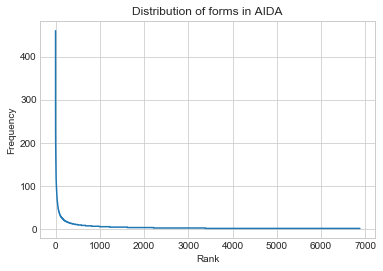

n3


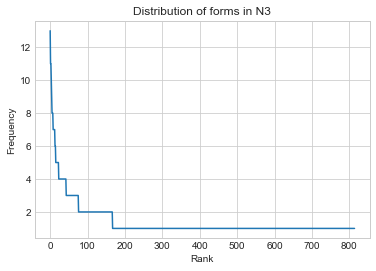

In [10]:
for title, data_forms_cnt in forms_cnt.items():
    print(title)
    plot_utils.plot_freq_dist(data_forms_cnt, 'forms in ' + title.upper(), 
                              x_axis='Rank', save=save)
#    plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
#                              x_axis='Rank', save=save)

**4.2. Log-log plots**

aida
n3


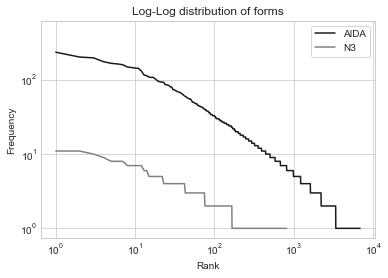

In [11]:
#for title, data_forms_cnt in forms_cnt.items():
#    plot_utils.plot_freq_dist(data_forms_cnt, 'forms in ' + title, 
#                          x_axis='Log(Rank)', loglog=True, 
#                          b=10, save=save)

plot_utils.plot_multi_freq_dist(forms_cnt, kind='forms', 
                          x_axis='Rank', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [12]:
for title, data_forms_cnt in forms_cnt.items():
    print('Slope of %s' % title)
    print(analysis_utils.calculate_slope(data_forms_cnt))
    print()
print('ALL')
print(analysis_utils.calculate_slope(all_cnt_forms))

Slope of aida
LinregressResult(slope=-0.9085055184143714, intercept=7.8255514656094025, rvalue=-0.980230426304651, pvalue=0.0, stderr=0.002211666075089343)

Slope of n3
LinregressResult(slope=-0.4291157858478489, intercept=2.6598145891571967, rvalue=-0.9145065635986074, pvalue=9.4e-322, stderr=0.0066578990862902745)

ALL
LinregressResult(slope=-0.89150386214697, intercept=7.732402257777029, rvalue=-0.9793746816704233, pvalue=0.0, stderr=0.002117710734137212)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

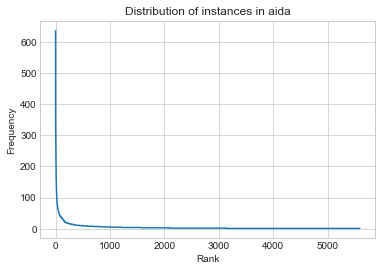

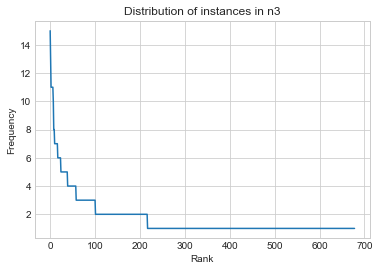

In [13]:
for title, data_instances_cnt in instances_cnt.items():
    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
                              x_axis='Rank', save=save)

**5.2. Log-log plots**

aida
n3


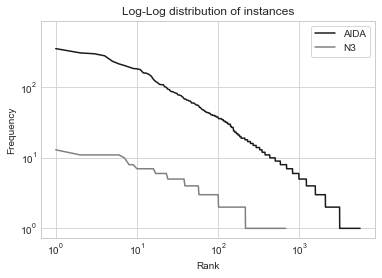

In [14]:
#for title, data_instances_cnt in instances_cnt.items():
#    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
#                              x_axis='Log(Rank)', loglog=True, 
#                              b=10, save=save)
    
plot_utils.plot_multi_freq_dist(instances_cnt, kind='instances', 
                              x_axis='Rank', loglog=True, 
                              b=10, save=save)

**5.3. Slope** 

In [15]:
for title, data_instances_cnt in instances_cnt.items():
    print('Slope of %s' % title)
    print(analysis_utils.calculate_slope(data_instances_cnt))
    print()
print('ALL')
print(analysis_utils.calculate_slope(all_cnt_instances))

Slope of aida
LinregressResult(slope=-0.9657417477440569, intercept=8.196237374207712, rvalue=-0.9817597280327227, pvalue=0.0, stderr=0.0025012217726795715)

Slope of n3
LinregressResult(slope=-0.5418946841833255, intercept=3.330739533590001, rvalue=-0.9503337969510662, pvalue=0.0, stderr=0.006820706078897001)

ALL
LinregressResult(slope=-0.9508303826500141, intercept=8.129758437316264, rvalue=-0.9818528987899069, pvalue=0.0, stderr=0.0023473874212897004)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [16]:
skip_zeros=True
pr_agg={}
pr_uniq={}
pageranks={}

for title, articles in data_articles.items():
    pr_agg[title], pr_uniq[title], this_pageranks=\
        analysis_utils.get_pageranks(articles, skip_zeros=skip_zeros)
    pageranks[title] = Counter(this_pageranks)


#### 6.2. Plot the PR distribution

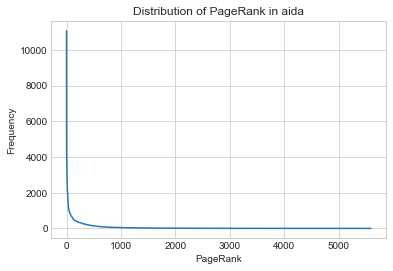

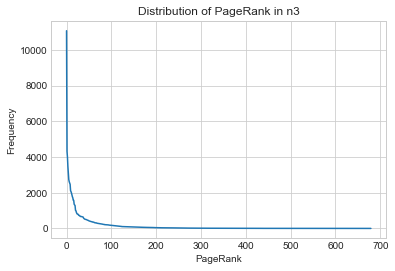

In [17]:
for title, pr in pageranks.items():
    plot_utils.plot_freq_dist(pr, 
                               title='PageRank in ' + title, 
                               x_axis='PageRank', save=True)

aida
n3


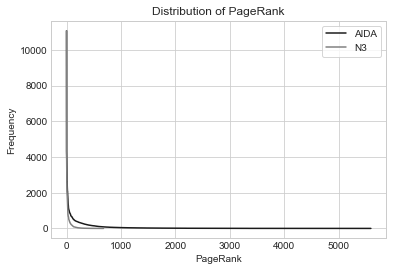

In [18]:
plot_utils.plot_multi_freq_dist(pageranks, 
                          kind='PageRank', 
                          x_axis='PageRank', save=True)

#### 6.3. Plot the PR distribution (log-log plot)

aida
n3


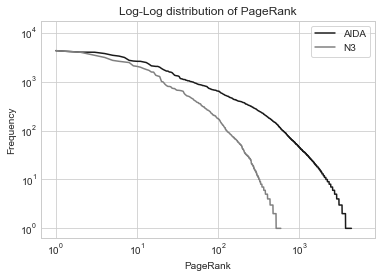

In [19]:
plot_utils.plot_multi_freq_dist(pageranks, kind='PageRank', 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)

#### 6.4. Inspect individual pagerank

In [20]:
# United_States has a max pageRank of 11066. 
pr=11066
print(pr_agg[n3_title][pr], pr_agg[aida_title][pr], pr_uniq[aida_title][pr])


11 636 1


### Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [21]:
interpretations, references = analysis_utils.get_interpretations_and_references(all_articles, 
                                                                            skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [22]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'China': 4,
 'Taiwan': 1,
 'BEIJING': 1,
 'Xinhua': 1,
 'Association for Relations Across the Taiwan Straits': 1,
 'Indians': 3,
 'Manny Acta': 1,
 'Education Secretary Arne Duncan': 1,
 'Rhee': 1,
 'Italy': 3,
 'ROME': 1,
 'Italian': 2,
 'Milan': 2,
 'Slovak': 1,
 'BRATISLAVA': 1,
 'Galanta': 1,
 'Slovakia': 2,
 'Vladimir Meciar': 1,
 'Movement for a Democratic Slovakia': 1,
 'Hearst Corp.': 1,
 'EUROLEAGUE': 1,
 'BRUSSELS': 1,
 'EuroLeague': 1,
 'Charleroi': 3,
 'Belgium': 3,
 'Estudiantes Madrid': 1,
 'Spain': 2,
 'Estudiantes': 2,
 'Belgrade': 1,
 'Partizan Belgrade': 1,
 'Yugoslavia': 2,
 'Kinder Bologna': 1,
 'Partizan': 2,
 'Dejan Koturovic': 1,
 'Zoran Savic': 1,
 'Colombia': 1,
 'BOGOTA': 1,
 'Antioquia': 1,
 'Medellin': 1,
 'Revolutionary Armed Forces of Colombia': 1,
 'FARC': 1,
 'Russians': 1,
 'Chechens': 2,
 'Grozny': 1,
 'GROZNY': 1,
 'Russia': 2,
 'Russian': 2,
 'GMT': 1,
 'Chechen': 1,
 'T-72': 1,
 'Alexander Lebed': 1,
 'Aslan Maskhadov': 1,
 'PHILADELPHIA': 5,
 'Uni

In [23]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [24]:
agg_per_ambiguity

defaultdict(int, {1: 7037, 2: 381, 3: 84, 4: 29, 5: 10, 6: 3, 12: 1})

In [25]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

508

In [26]:
"""
plot_utils.annotated_heatmap(['AIDA (with NILs)', 'AIDA (without NILs)', 'WES2015', 'both'], 
                  [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                  [10393, 465, 114, 26, 13, 2, 1, 0, 0, 0, 0, 0, 1,
                   6400, 359, 78, 29, 7, 3, 0, 0, 0, 0, 0, 0, 0,
                    12265, 432, 68, 14, 5, 2, 0, 0, 0, 0, 0, 0, 0,
                   18234, 813, 160, 49, 16, 6, 1, 0, 0, 0, 0, 1, 0
                  ], 
                 x_lbl='ambiguity level')
"""

"\nplot_utils.annotated_heatmap(['AIDA (with NILs)', 'AIDA (without NILs)', 'WES2015', 'both'], \n                  [1,2,3,4,5,6,7,8,9,10,11,12,13], \n                  [10393, 465, 114, 26, 13, 2, 1, 0, 0, 0, 0, 0, 1,\n                   6400, 359, 78, 29, 7, 3, 0, 0, 0, 0, 0, 0, 0,\n                    12265, 432, 68, 14, 5, 2, 0, 0, 0, 0, 0, 0, 0,\n                   18234, 813, 160, 49, 16, 6, 1, 0, 0, 0, 0, 1, 0\n                  ], \n                 x_lbl='ambiguity level')\n"

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [27]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'China': 3,
 'Taiwan': 3,
 'Beijing': 2,
 'Xinhua_News_Agency': 1,
 'Association_for_Relations_Across_the_Taiwan_Straits': 1,
 'Cleveland_Indians': 5,
 'Manny_Acta': 1,
 'Arne_Duncan': 2,
 'Michelle_Rhee': 1,
 'Italy': 6,
 'Rome': 3,
 'Milan': 2,
 'Slovakia': 3,
 'Bratislava': 2,
 'Galanta': 1,
 'Vladimír_Mečiar': 1,
 "People's_Party_–_Movement_for_a_Democratic_Slovakia": 1,
 'Hearst_Corporation': 1,
 'Euroleague': 2,
 'Brussels': 2,
 'Charleroi': 1,
 'Spirou_Charleroi': 1,
 'Belgium': 3,
 'CB_Estudiantes': 2,
 'Spain': 5,
 'Belgrade': 2,
 'KK_Partizan': 2,
 'Yugoslavia': 3,
 'Virtus_Pallacanestro_Bologna': 1,
 'Dejan_Koturović': 1,
 'Zoran_Savić': 1,
 'Colombia': 3,
 'Bogotá': 2,
 'Antioquia_Department': 1,
 'Medellín': 1,
 'FARC': 2,
 'Russia': 7,
 'Chechnya': 4,
 'Grozny': 2,
 'Greenwich_Mean_Time': 1,
 'T-72': 1,
 'Alexander_Lebed': 2,
 'Aslan_Maskhadov': 3,
 'Philadelphia': 2,
 'University_of_Pennsylvania': 1,
 'Moscow': 2,
 'Interfax': 1,
 'Interior_ministry': 3,
 'DBRS': 2,
 'T

In [28]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [29]:
agg_per_variance

defaultdict(int,
            {1: 4555,
             2: 1206,
             3: 247,
             4: 74,
             5: 22,
             6: 10,
             7: 6,
             10: 2,
             11: 1})

In [30]:
sum(i for j,i in agg_per_variance.items() if j>1)

1568

In [31]:
"""
plot_utils.annotated_heatmap(['AIDA (without NILs)', 'WES2015', 'both'],
                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                  [4156, 1118, 230, 56, 19, 10, 6, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                  7153, 1456, 502, 212, 92, 40, 15, 11, 3, 0, 0, 5, 1, 1, 0, 0, 0, 0,
                   10924, 2530, 759, 278, 110, 50, 19, 17, 6, 1, 1, 6, 0, 1, 0, 0, 0, 1
                  ],
                  x_lbl='variance level'
)
"""

"\nplot_utils.annotated_heatmap(['AIDA (without NILs)', 'WES2015', 'both'],\n                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],\n                  [4156, 1118, 230, 56, 19, 10, 6, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,\n                  7153, 1456, 502, 212, 92, 40, 15, 11, 3, 0, 0, 5, 1, 1, 0, 0, 0, 0,\n                   10924, 2530, 759, 278, 110, 50, 19, 17, 6, 1, 1, 6, 0, 1, 0, 0, 0, 1\n                  ],\n                  x_lbl='variance level'\n)\n"

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

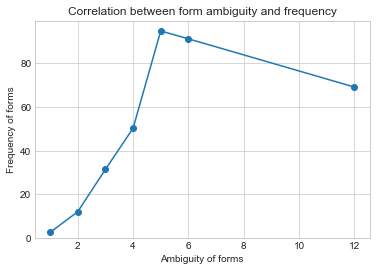

In [32]:
plot_utils.frequency_correlation(ambiguity, 
                                 all_cnt_forms, 
                                 title='Correlation between form ambiguity and frequency', 
                                 x_label='Ambiguity of forms', 
                                 y_label='Frequency of forms',
                                 save=save)

In [33]:
form_y_freq, form_x_amb = analysis_utils.prepare_lists(all_cnt_forms, ambiguity)

correlation, significance = spearmanr(form_x_amb,form_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.37723436836693475 . Significance:  8.905920383912834e-254


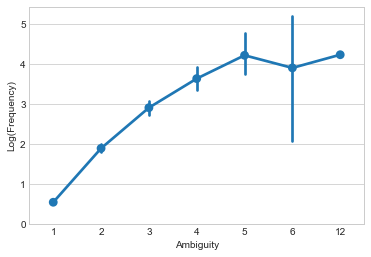

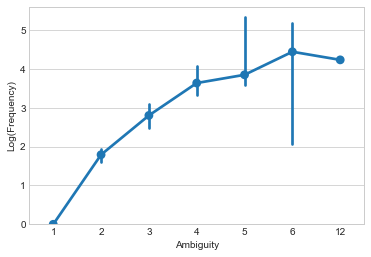

In [34]:
plot_utils.plot_line_with_whiskers(form_x_amb, np.log(form_y_freq),
                        xl='Ambiguity',
                        yl='Log(Frequency)',
#                        title='Correlation between form ambiguity and frequency',
                        title='',
                        save=save)

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

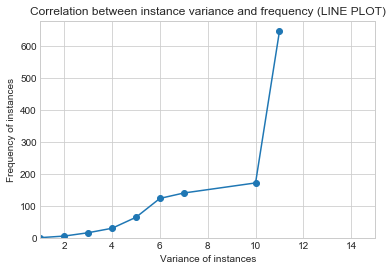

In [35]:
plot_utils.frequency_correlation(variance, 
                                 all_cnt_instances, 
                                 title='Correlation between instance variance and frequency (LINE PLOT)', 
                                 x_label='Variance of instances', 
                                 y_label='Frequency of instances',
                                 xlim=[1,15],
                                 save=save)

In [36]:
insta_y_freq, insta_x_var = analysis_utils.prepare_lists(all_cnt_instances, variance)

In [37]:
correlation, significance = spearmanr(insta_x_var, insta_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.6347768772094183 . Significance:  0.0


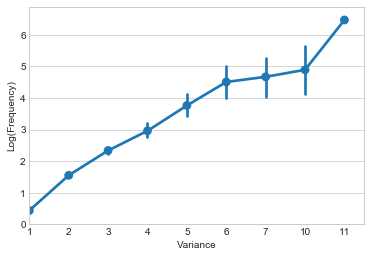

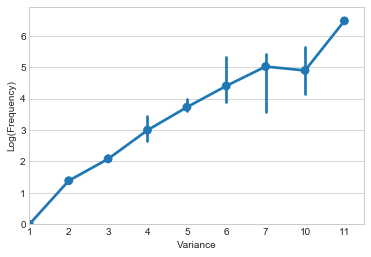

In [38]:
plot_utils.plot_line_with_whiskers(insta_x_var, np.log(insta_y_freq),
                        xl='Variance',
                        yl='Log(Frequency)',
                        title='',
                        xlim=[0,None],
                        save=save)

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [39]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

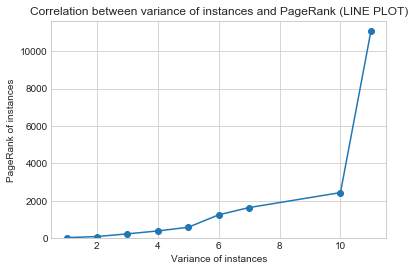

In [40]:
plot_utils.frequency_correlation(variance, 
                                 all_pr_instances, 
                                 title='Correlation between variance of instances and PageRank (LINE PLOT)',
                                 x_label='Variance of instances', 
                                 y_label='PageRank of instances',
                                 save=save)

In [41]:
insta_y_pr, insta_x_var2 = analysis_utils.prepare_lists(
    all_pr_instances, variance)

In [42]:
correlation, significance = spearmanr(insta_x_var2, insta_y_pr)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.25419570265687214 . Significance:  1.0746937212597496e-71


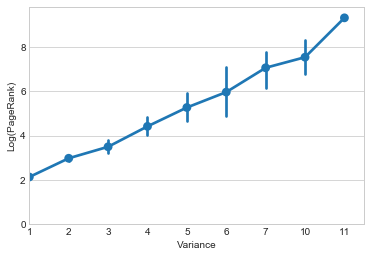

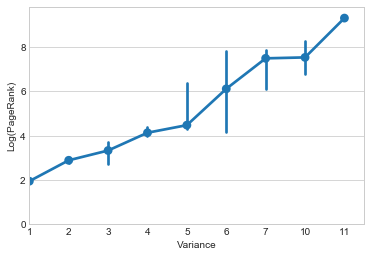

In [43]:
plot_utils.plot_line_with_whiskers(insta_x_var2, np.log(insta_y_pr),
                        xl='Variance',
                        yl='Log(PageRank)',
                        title='',
                        xlim=[0,None],
                        save=save)

### 13) Correlation between PageRank and frequency

In [44]:
all_pr_instances

{'China': 2612,
 'Taiwan': 854,
 'Beijing': 514,
 'Xinhua_News_Agency': 26,
 'Association_for_Relations_Across_the_Taiwan_Straits': 2,
 'Cleveland_Indians': 83,
 'Manny_Acta': 1,
 'Arne_Duncan': 6,
 'Michelle_Rhee': 1,
 'Italy': 2466,
 'Rome': 807,
 'Milan': 384,
 'Slovakia': 517,
 'Bratislava': 136,
 'Galanta': 2,
 'Vladimír_Mečiar': 2,
 "People's_Party_–_Movement_for_a_Democratic_Slovakia": 4,
 'Hearst_Corporation': 50,
 'Euroleague': 49,
 'Brussels': 375,
 'Charleroi': 23,
 'Spirou_Charleroi': 3,
 'Belgium': 1012,
 'CB_Estudiantes': 7,
 'Spain': 1981,
 'Belgrade': 228,
 'KK_Partizan': 9,
 'Yugoslavia': 223,
 'Virtus_Pallacanestro_Bologna': 8,
 'Zoran_Savić': 1,
 'Colombia': 676,
 'Bogotá': 126,
 'Antioquia_Department': 25,
 'Medellín': 41,
 'FARC': 18,
 'Russia': 2613,
 'Chechnya': 62,
 'Grozny': 15,
 'Greenwich_Mean_Time': 253,
 'T-72': 13,
 'Alexander_Lebed': 3,
 'Aslan_Maskhadov': 3,
 'Philadelphia': 737,
 'University_of_Pennsylvania': 192,
 'Moscow': 645,
 'Interfax': 3,
 'Inter

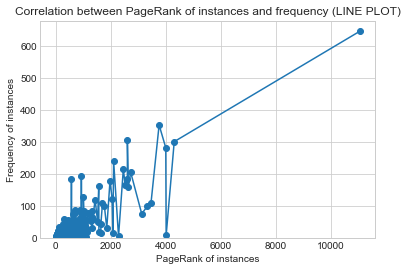

In [45]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

In [46]:
insta_x_pr_2, insta_y_freq2 = analysis_utils.prepare_lists(
    all_pr_instances, all_cnt_instances)

In [47]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.3281160272862797 . Significance:  6.565092084629179e-121


In [48]:
norm_x_pr = np.rint(np.log(insta_x_pr_2))
norm_x_pr
norm_y_freq=np.log(insta_y_freq2)

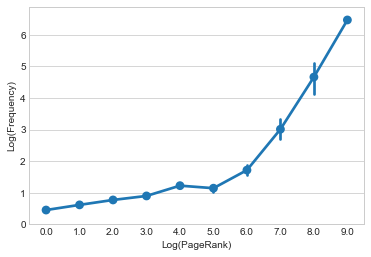

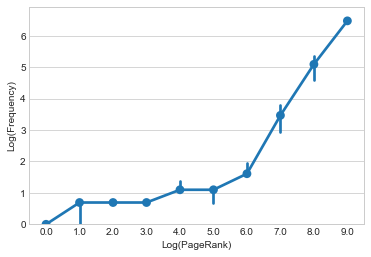

In [49]:
plot_utils.plot_line_with_whiskers(norm_x_pr, norm_y_freq,
                        xl='Log(PageRank)',
                        yl='Log(Frequency)',
                        title='',
                        save=save)

### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [50]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=analysis_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

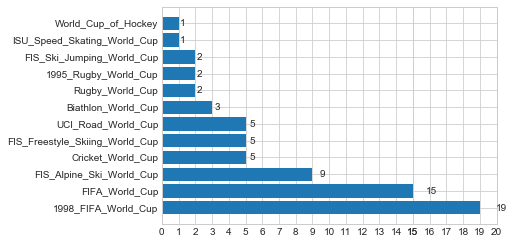

In [51]:
#fig = plt.figure()
fig, ax = plt.subplots()

br = ax.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18,19,20])

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_form_freq.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [52]:
form='World Cup' # this is the form with max ambiguity
import operator


ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

ISU_Speed_Skating_World_Cup 	 3
Cricket_World_Cup 	 34
World_Cup_of_Hockey 	 6
FIS_Freestyle_Skiing_World_Cup 	 3
Biathlon_World_Cup 	 5
FIS_Ski_Jumping_World_Cup 	 9
Rugby_World_Cup 	 52
UCI_Road_World_Cup 	 4
FIFA_World_Cup 	 186
1995_Rugby_World_Cup 	 16
FIS_Alpine_Ski_World_Cup 	 21
1998_FIFA_World_Cup 	 59


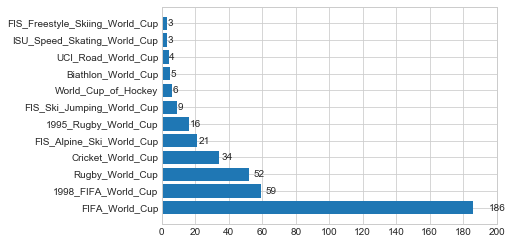

In [53]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])

plot_utils.autolabelh(br, ax)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

In [54]:
prs=[]
freqs=[]
labels=[]
for form2, pr in reversed(entries):
    for form, freq in insts:
        if form==form2:
            print(form, freq, pr)
            freqs.append(freq)
            prs.append(pr)
            labels.append(form)

FIS_Freestyle_Skiing_World_Cup 5 3
ISU_Speed_Skating_World_Cup 1 3
UCI_Road_World_Cup 5 4
Biathlon_World_Cup 3 5
World_Cup_of_Hockey 1 6
FIS_Ski_Jumping_World_Cup 2 9
1995_Rugby_World_Cup 2 16
FIS_Alpine_Ski_World_Cup 9 21
Cricket_World_Cup 5 34
Rugby_World_Cup 2 52
1998_FIFA_World_Cup 19 59
FIFA_World_Cup 15 186


In [55]:
correlation, significance = spearmanr(prs, freqs)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.5036097450903102 . Significance:  0.09507085530230283


### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [56]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=analysis_utils.get_instance_distribution(all_articles, instance)

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

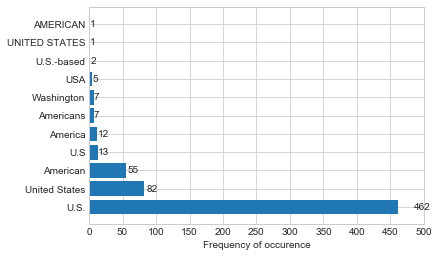

In [57]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500])
plt.xlabel('Frequency of occurence')

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_insta_freq.png', bbox_inches='tight')